In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# from tomo2mesh.misc import viewer
# from tomo2mesh.structures.datafile import DataFile
from tomo2mesh.projects.eaton.params import pixel_size_1X as pixel_size
# from tomo2mesh.misc.voxel_processing import TimerGPU, edge_map, modified_autocontrast, get_values_cyl_mask, cylindrical_mask, TimerCPU
# from tomo2mesh.projects.eaton.rw_utils_ae import read_raw_data_1X, save_path
# from tomo2mesh.projects.eaton.recon import recon_binned, recon_all
# from tomo2mesh.structures.voids import VoidLayers

#from scratchpad.polymer_am_eaton.scratch.plot_eaton_graphs_ae import merge_void_layers
import tifffile as tf

from skimage.filters import threshold_otsu


In [2]:
# b = 1
# sample_name = "1"
# dust_thresh = 2
# z_max = []
# voids_list = []
# rdf = pd.read_csv(save_path)
# number_density_radius = 50

# voids_all = merge_void_layers(sample_name, b, pixel_size, dust_thresh)


In [3]:
df = pd.read_csv("/data01/Eaton_Polymer_AM/csv_files/local_porosity_vals.csv")
df2 = pd.read_csv("/data01/Eaton_Polymer_AM/csv_files/porosity_vals_adj2.csv")


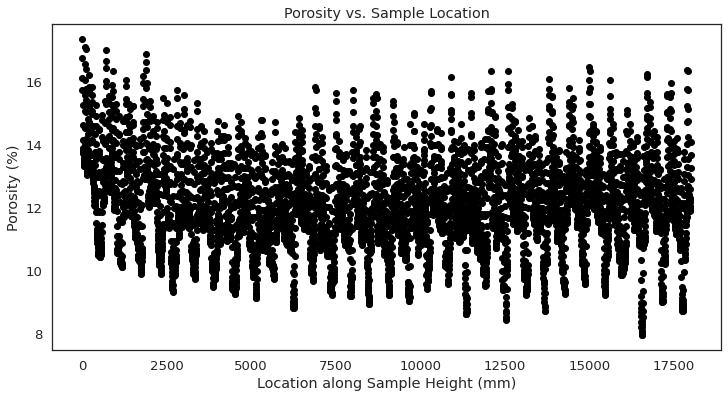

In [4]:
porosity_z = df["porosity_z"]
porosity_z = np.array(porosity_z)*100
dist = np.linspace(0,len(porosity_z)*pixel_size,len(porosity_z))

sns.set(font_scale=1.2)
sns.set_style(style = "white")
fig, ax = plt.subplots(1,1, figsize = (12,6))
ax.scatter(dist, porosity_z, marker="o", color = "black")
ax.set_title("Porosity vs. Sample Location")
ax.set_xlabel(f"Location along Sample Height (mm)")
ax.set_ylabel("Porosity (%)")
#ax.set_ylim([8.5,12])
# plt.savefig(plots_dir + f'sensitivity_test_porosity_sample{sample_tag}_scan{str(scan_tag)}.png', format='png')
# plt.close()
plt.show()


In [5]:
N=200
porosity_z = df["porosity_z"]
porosity_z = np.array(porosity_z)*100
dist = np.linspace(0,len(porosity_z)*pixel_size,N)*(10**-3)
porosity_z_mean = np.array_split(porosity_z,N)
porosity_z_mean = [np.mean(i) for i in np.array_split(porosity_z,N)]
porosity_z_std = [np.std(i)/np.sqrt(len(i)) for i in np.array_split(porosity_z,N)]


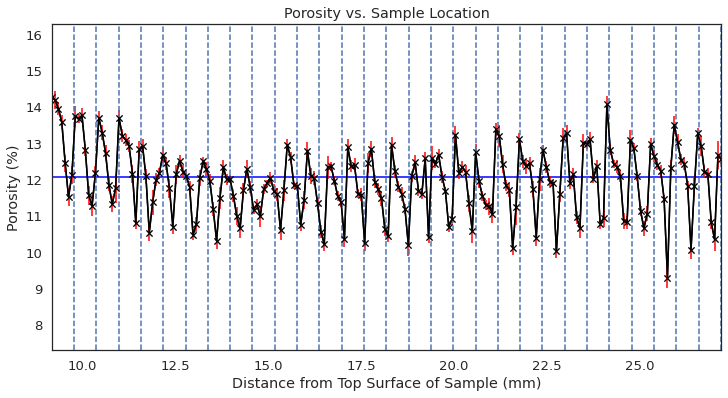

12.075111120000573

In [6]:
sns.set(font_scale=1.2)
sns.set_style(style = "white")
fig, ax = plt.subplots(1,1, figsize = (12,6))
ax.plot(dist+(1536//2-35)*3.13*4*10**-3, porosity_z_mean, marker="x", color = "black")
ax.axhline(y=np.mean(list(df2["porosity"][0:5]))*100, color='blue', linestyle='-')
ax.errorbar(dist+(1536//2-35)*3.13*4*10**-3, porosity_z_mean, xerr=0, yerr=porosity_z_std, fmt='-x', color = 'black', ecolor = 'red')
ax.set_title("Porosity vs. Sample Location")
ax.set_xlabel(f"Distance from Top Surface of Sample (mm)")
ax.set_ylabel("Porosity (%)")
#ax.set_ylim([8.5,12])
# plt.savefig(plots_dir + f'sensitivity_test_porosity_sample{sample_tag}_scan{str(scan_tag)}.png', format='png')
# plt.close()

top = np.max(porosity_z_mean)+2
bot = np.min(porosity_z_mean)-2
lines_600um = np.arange((1536//2-35)*3.13*4*10**-3,max(dist+(1536//2-35)*3.13*4*10**-3),0.6)
ax.vlines(lines_600um, bot, top,linestyles='--')
ax.set_ylim([bot,top])
ax.set_xlim([(1536//2-35)*3.13*4*10**-3,max(dist+(1536//2-35)*3.13*4*10**-3)])
plt.show()

np.mean(list(df2["porosity"][0:5]))*100


In [8]:
list(df2["porosity"][0:5])

[0.1275591680547484,
 0.1179061170723285,
 0.1179422878465184,
 0.1201157334446089,
 0.1202322495818244]